In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
clientes=pd.read_csv("creditos.csv") #Llamamos al DF
clientes#ejecutamos el DF

,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0
...,...,...,...
195,55,100000,0
196,55,523144,0
197,55,543771,0
198,56,285288,0


PAGADORES VS DEUDORES

In [12]:
buenos=clientes[clientes["cumplio"]==1] #creamos un filtro aplicado al DF en el cual el codigo 1 es igual a cumplio
malos=clientes[clientes["cumplio"]==0]#creamos un filtro para los deudores
buenos,malos #mostramos la lista de los clientes buenos y malos

(     edad  credito  cumplio
 1      19   477965        1
 6      23   583565        1
 7      24   100000        1
 8      24   199272        1
 13     25   195341        1
 ..    ...      ...      ...
 187    51   354045        1
 188    51   379188        1
 189    51   396544        1
 190    52   100000        1
 192    53   130475        1
 
 [167 rows x 3 columns],
      edad  credito  cumplio
 0      18   363112        0
 2      20   239072        0
 3      22   195265        0
 4      22   482174        0
 5      23   468815        0
 9      24   246195        0
 10     24   433444        0
 11     25   100000        0
 12     25   161474        0
 40     28   432323        0
 53     29   590394        0
 54     29   595997        0
 56     30   157157        0
 64     31   173752        0
 78     32   588455        0
 93     35   521187        0
 97     36   568053        0
 98     37   299154        0
 113    40   100000        0
 118    40   459974        0
 135    43   498

GRAFICA DE LOS PAGADORES VS DEUDORES

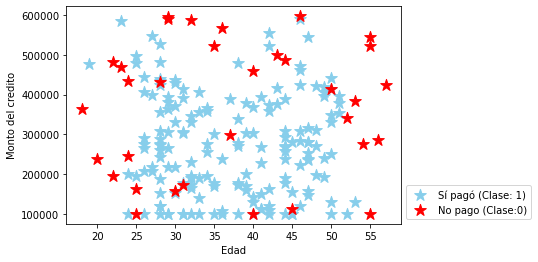

In [13]:
plt.scatter(buenos["edad"], buenos["credito"], marker="*" , s=150, color="skyblue",label="Sí pagó (Clase: 1)") #aqui graficamos los clientes buenos

plt.scatter(malos["edad"], malos["credito"], marker="*", s=150 , color="red", label="No pago (Clase:0)") #aqui graficamos lo clientes malos

plt.ylabel("Monto del credito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1,0.2))
plt.show()


PREPARACION DE LOS DATOS (ESCALAR)
PREPROCESAMIENTO

In [14]:
datos=clientes[["edad" , "credito"]] # separamos los datos a trabajar en este caso en el eje x va la edad y en el y el credito
clase=clientes["cumplio"] # la clase que nos va guiar para la creaccion del clasificador( modelo supervisado)

escalador=preprocessing.MinMaxScaler() #este modulo preprocesador convierte los numeros mas pequeños en cero y los mas grandes 1
datos=escalador.fit_transform(datos)#comando para que trabajemos con los datos de prueba
datos

array([[0.        , 0.52964444],
       [0.02564103, 0.76084353],
       [0.05128205, 0.27995193],
       [0.1025641 , 0.19176844],
       [0.1025641 , 0.76931624],
       [0.12820513, 0.74242458],
       [0.12820513, 0.97341632],
       [0.15384615, 0.        ],
       [0.15384615, 0.19983453],
       [0.15384615, 0.29429053],
       [0.15384615, 0.67122276],
       [0.17948718, 0.        ],
       [0.17948718, 0.12374716],
       [0.17948718, 0.19192143],
       [0.17948718, 0.76130249],
       [0.17948718, 0.79673129],
       [0.20512821, 0.        ],
       [0.20512821, 0.21862589],
       [0.20512821, 0.33577846],
       [0.20512821, 0.35571521],
       [0.20512821, 0.38628463],
       [0.20512821, 0.61926119],
       [0.20512821, 0.69480706],
       [0.23076923, 0.21664509],
       [0.23076923, 0.23805134],
       [0.23076923, 0.60140789],
       [0.23076923, 0.90058196],
       [0.25641026, 0.        ],
       [0.25641026, 0.03816245],
       [0.25641026, 0.03904616],
       [0.

CREACION DEL MODELO KNN

Valor de K

In [15]:
clasificador = KNeighborsClassifier(n_neighbors=3)#creacion de un objeto clasificador KNN
#Normalmente la K se obtiene por medio de experimentacion o la raiz cuadrada del numero de instancias(ej 200)

clasificador.fit(datos, clase)#metodo para crear nuestro modelo clasificador , los datos son la edad y el monto
#con el metodo fit creamos el modelo

KNeighborsClassifier(n_neighbors=3)

NUEVO SOLICITANTE (CLASIFICACION)

C:\Users\guz_g\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Clase: [0]
Probabilidades por clase [[0.66666667 0.33333333]]


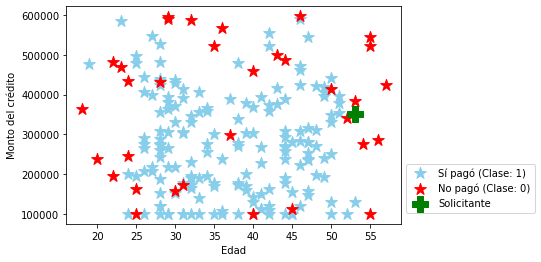

In [16]:
edad = 53
monto = 350000

#Escalar los datos del nuevo solicitante
solicitante = escalador.transform([[edad, monto]]) #creamos una variable para escalar los datos

#Calcular clase y probabilidades
print("Clase:", clasificador.predict(solicitante))
print("Probabilidades por clase",clasificador.predict_proba(solicitante)) #me dira la probabilidad de que pague 1-2, 2-3, etc

#Código para graficar
plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue", label="Sí pagó (Clase: 1)")
plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red", label="No pagó (Clase: 0)")
plt.scatter(edad, monto, marker="P", s=250, color="green", label="Solicitante") 
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()